In [1]:
import sys, os, glob, warnings, logging
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sw_plotting import change_bar_width
from sw_utilities import tukeyTest

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.ERROR)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family' : 'Arial',
        'size'   : 8}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'

# Make a folder if it is not already there to store exported figures
!mkdir ../jupyter_figures


In [2]:
# Read in data
df = pd.read_csv('../data/Fig3-ER-mRNA-tethering/211028-LV367-368-369-370-smFISH-Nikon-40xWI-rotated-cropped-output/211028-LV367-368-369-370-smFISH-Nikon-40xWI-rotated-cropped_apical_basal_ROI_dot_count_area.txt', sep='\t')
df.head()


,file_name,apical_dot_number,apical_area,basal_dot_number,basal_area
0,LV-367-s01-001,47,79.8426,70,68.5420
1,LV-367-s01-002,46,62.0511,50,81.7761
2,LV-367-s01-003,20,30.3831,84,85.0426
3,LV-367-s01-004,31,42.3622,49,107.1514
4,LV-367-s01-005,71,76.5521,68,90.4046


In [3]:
# compute dot density and the polarity index
df['apical_density'] = df.apical_dot_number * 100 / df.apical_area # dot number per 100 um2
df['basal_density'] = df.basal_dot_number * 100 / df.basal_area # dot number per 100 um2
df['polarity_index'] = (df.apical_density - df.basal_density) / (df.apical_density + df.basal_density)
# df['area_ratio'] = df.apical_area / df.basal_area
# df['density_ratio'] = df.apical_density / df.basal_density
# df['count_ratio'] = df.apical_dot_number / df.basal_dot_number

In [4]:
# annotate the data
LV_id, organoid_id, LV_organoid_id, cell_id = [], [], [], []
for i in range(len(df)):
    f = df.file_name[i]
    LV_id.append( f.split('-')[1] )
    organoid_id.append( f.split('-')[2][1:] )
    LV_organoid_id.append( f.split('-')[1] + '_' + f.split('-')[2][1:] )
    cell_id.append( f.split('-')[3] )

df['LV_id'] = LV_id
df['organoid_id'] = organoid_id
df['LV_organoid_id'] = LV_organoid_id
df['cell_id'] = cell_id

df.head()


,file_name,apical_dot_number,apical_area,basal_dot_number,basal_area,apical_density,basal_density,polarity_index,LV_id,organoid_id,LV_organoid_id,cell_id
0,LV-367-s01-001,47,79.8426,70,68.5420,58.865818,102.127163,-0.268716,367,01,367_01,001
1,LV-367-s01-002,46,62.0511,50,81.7761,74.132449,61.142559,0.096026,367,01,367_01,002
2,LV-367-s01-003,20,30.3831,84,85.0426,65.826068,98.774026,-0.200170,367,01,367_01,003
3,LV-367-s01-004,31,42.3622,49,107.1514,73.178447,45.729687,0.230840,367,01,367_01,004
4,LV-367-s01-005,71,76.5521,68,90.4046,92.747292,75.217412,0.104366,367,01,367_01,005


In [5]:
df_orgnoids = df.groupby('LV_organoid_id').mean()

In [6]:
df_orgnoids.reset_index(inplace=True)
df_orgnoids['LV_id'] = [i[:3] for i in df_orgnoids.LV_organoid_id]
df_orgnoids['organoid_id'] = [i[-2:] for i in df_orgnoids.LV_organoid_id]
df_orgnoids.head()

,LV_organoid_id,apical_dot_number,apical_area,basal_dot_number,basal_area,apical_density,basal_density,polarity_index,LV_id,organoid_id
0,367_01,43.000000,58.238220,64.200000,86.583340,72.950015,76.598169,-0.007531,367,01
1,367_02,43.833333,49.990967,57.000000,67.397183,103.320246,83.222408,0.062639,367,02
2,367_03,35.000000,44.061467,54.333333,67.251067,75.434222,82.630105,-0.037596,367,03
3,367_04,40.666667,46.529333,78.333333,65.521767,88.848772,131.844962,-0.175885,367,04
4,367_05,58.333333,42.870567,81.333333,68.143733,135.807530,119.165298,0.065431,367,05


In [7]:
tukeyTest(df_orgnoids.polarity_index, df_orgnoids.LV_id)

Summary of test:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   367    368   0.2891    0.0   0.169 0.4093   True
   367    369   0.3879    0.0  0.2678 0.5081   True
   367    370   0.3438    0.0  0.2236 0.4639   True
   368    369   0.0988 0.1312 -0.0213 0.2189  False
   368    370   0.0547 0.5896 -0.0655 0.1748  False
   369    370  -0.0441 0.7351 -0.1643  0.076  False
---------------------------------------------------
p values of all pair-wise tests:
 [0.001      0.001      0.001      0.13106974 0.58192307 0.71550236]


<Axes: xlabel='LV_id', ylabel='polarity_index'>

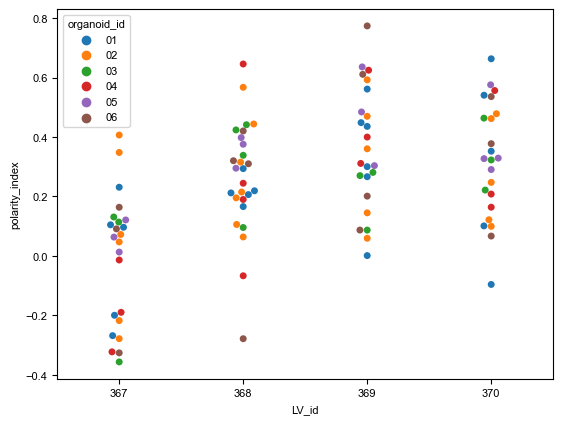

In [8]:
sns.swarmplot(data = df, x='LV_id', y='polarity_index', hue='organoid_id')

<Axes: xlabel='LV_id', ylabel='polarity_index'>

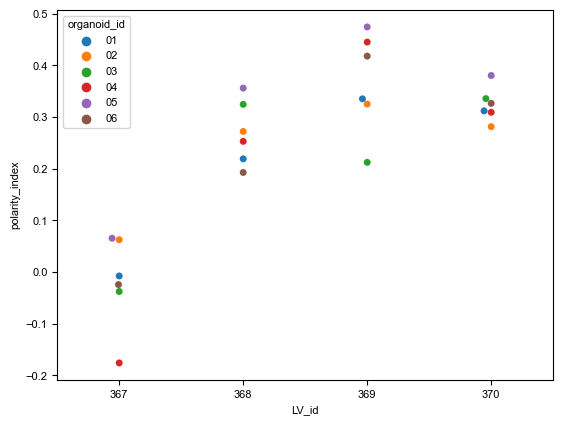

In [9]:
sns.swarmplot(data = df_orgnoids, x='LV_id', y='polarity_index', hue='organoid_id')

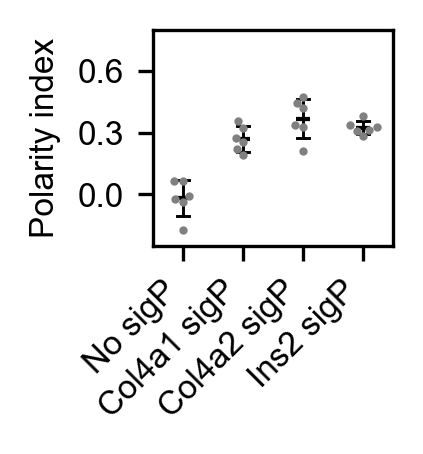

In [20]:
# Swarm plot of 4 categories

outputPrefix = '211028-LV367-368-369-370-smFISH-Nikon-40xWI-polarity-index-swarm'
outputFigPath = "../jupyter_figures/" + outputPrefix + ".svg"

fig_width=1.0
fig_height=0.9
fig = plt.figure(figsize=(fig_width,fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax = sns.swarmplot(x='LV_id', y='polarity_index', data=df_orgnoids,
#                    hue='organoid_id',
                   color="Gray",
                   size=2)

# ax = sns.barplot(x='LV_id', y='polarity_index', data=df_orgnoids,
#                  color=".7", alpha=1.0,
#                  errwidth=.7, errcolor="k", capsize=.2, ci='sd')
# # make the bar width narrower
# change_bar_width(ax, .5)

ax = sns.pointplot(x='LV_id', y='polarity_index', data=df_orgnoids,
                   ci='sd', capsize=.2, errwidth=.7,
                   markers='_', scale=.5, join=False, color="Black")

plt.ylim(-0.25, 0.8)
plt.yticks([0, 0.3, 0.6])

plt.xlabel(None)
plt.ylabel("Polarity index")

# rotate x tick labels
x_labels = ['No sigP', 'Col4a1 sigP', 'Col4a2 sigP', 'Ins2 sigP']
# x_labels = ax.get_xticklabels()
ax.set_xticklabels(labels=x_labels, rotation=45, ha="right")

# # Remove legend (symbols representing orgnoids)
# ax.get_legend().remove()

for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

if outputFigPath is not None:
    plt.savefig(outputFigPath)
